## Step 0: Imports and Reading Data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/kaancakir/data/analysis/fedExAnalyis/SCMS_Delivery_History_Dataset.csv')

In [6]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## Step 0.1: Design the Charts

#### General Charts Design

In [25]:
def chart_styling(ax, fig, title, bars, logo_path='logo.png'):
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09, 1.05, title, fontsize=18, fontweight='bold', fontfamily='serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.85, 0.85, 0.1, 0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis='y', linestyle='-', alpha=0.2)
    ax.set_axisbelow(True)

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis='both', which='major', labelsize=12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

    for bar in bars:
        bar.set_color('#008080') 
        
    for bar in bars:
        bar.set_edgecolor('#000000')
        bar.set_linewidth(0.5)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#### Pie Charts Design

In [39]:
def chart_styling_pie(ax, fig, title, wedges, logo_path='logo.png'):
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09, 1.05, title, fontsize=18, fontweight='bold', fontfamily='serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.85, 0.85, 0.1, 0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    for wedge in wedges:
        wedge.set_color('#008080')
        wedge.set_edgecolor('#000000')
        wedge.set_linewidth(0.5)

## Step 1: Data Understanding


In [8]:
print(f"Number of Rows : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")

Number of Rows : 10324
Number of Columns : 33


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [11]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [12]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


FileNotFoundError: [Errno 2] No such file or directory: 'Sorted by Number of Missing Values'

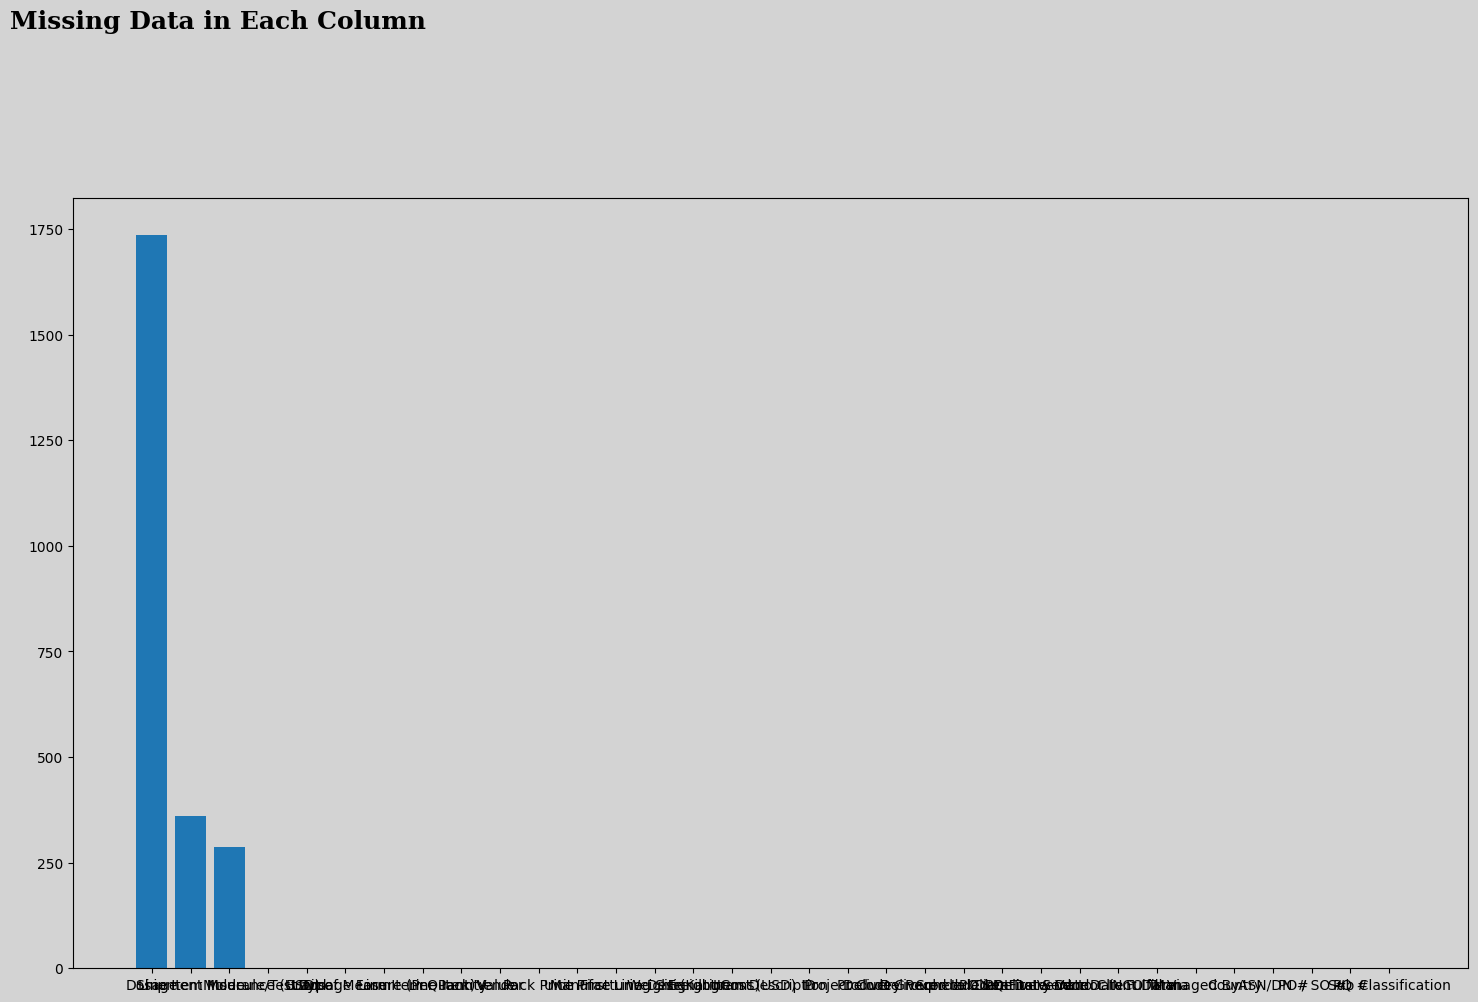

In [13]:
missing_data = df.isnull().sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(missing_data.index, missing_data.values)
title = "Missing Data in Each Column"
subtitle = "Sorted by Number of Missing Values"

chart_styling(ax, fig, title, subtitle)
plt.show()


In [ ]:
for column in df.columns:
    print(f"{column} : {len(df[column].unique())}")

## Step 2: Data Preperation

In [15]:
fedex = df[['Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)'
    ]]

fedex.head(5)

,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Vendor,Line Item Insurance (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,19,551.0,13,780.34,RANBAXY Fine Chemicals LTD.,NaN
1,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,1000,6200.0,358,4521.5,Aurobindo Pharma Limited,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,500,40000.0,171,1653.78,Abbott GmbH & Co. KG,NaN
3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,31920,127360.8,1855,16007.06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,NaN
4,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,38000,121600.0,7590,45450.08,Aurobindo Pharma Limited,NaN


#### Fill the NA values with the modes of that values.


In [ ]:
shipmentModeMode = fedex['Shipment Mode'].mode()[0]

fedex['Shipment Mode'].fillna(shipmentModeMode, inplace=True)

fedex['Shipment Mode'].isnull().sum()


#### Fill the NA values with the 0 values.


In [ ]:

fedex['Line Item Insurance (USD)'] = fedex['Line Item Insurance (USD)'].fillna(0)

fedex['Line Item Insurance (USD)'].isnull().sum()

In [ ]:
fedex.drop_duplicates(inplace=True)

In [ ]:
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']

for col in date_columns:
    fedex[col] = pd.to_datetime(fedex[col], errors='coerce') 

In [ ]:
numeric_columns = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']
for column in numeric_columns:
    fedex[column] = pd.to_numeric(fedex[column], errors='coerce')

In [ ]:
fedex['Country'] = fedex['Country'].str.strip().str.lower() 

In [46]:
fedex['Freight Cost (USD)'] = pd.to_numeric(fedex['Freight Cost (USD)'], errors='coerce')

In [60]:
numeric_columns = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 
                   'Freight Cost (USD)', 'Line Item Insurance (USD)']
for col in numeric_columns:
    fedex[col] = pd.to_numeric(fedex[col], errors='coerce')

In [72]:
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 
                'Scheduled Delivery Date', 'Delivered to Client Date', 
                'Delivery Recorded Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce') 

In [ ]:
fedex.info()

## Step 3: Features


#### Count of Shipments by Country

In [ ]:
m = fedex['Country'].value_counts().head(10).index
n = fedex['Country'].value_counts().head(10).values

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
bars = sns.barplot(x=m, y=n, ax=ax)

chart_styling(ax=ax, fig=fig, title="Count of Shipment By Country", bars=bars.patches)

plt.show()


#### Distribution of Shipment Modes

In [ ]:
m = fedex['Shipment Mode'].value_counts()

fig, ax = plt.subplots(figsize=(18, 10))

wedges, texts, autotexts = ax.pie(m, labels=m.index, autopct='%1.1f%%', startangle=140)

chart_styling_pie(ax=ax, fig=fig, title="Shipment Mode Distribution", wedges=wedges)

plt.show()

#### Average Freight Cost

In [ ]:
m = fedex['Freight Cost (USD)'].mean()
n = fedex['Freight Cost (USD)']

fig, ax = plt.subplots(1, 1, figsize=(18, 10))

bars = sns.histplot(x=n, ax=ax, kde=True, bins=30)

chart_styling(ax=ax, fig=fig, title='Freight Cost Distribution', bars=bars.patches)

plt.show()

#### Line Item Quantity Distribution

In [ ]:
m = fedex['Line Item Quantity'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(18, 10))

bars = sns.histplot(x= 'Line Item Quantity', data = fedex ,ax = ax, kde = True ,bins= 30)

chart_styling(ax=ax, fig=fig, title='Line Item Quantity Distribution', bars=bars.patches)

plt.show()


#### Weight Distribution (Kilograms)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

bars = sns.boxplot(x='Weight (Kilograms)', data=fedex, ax=ax ,showfliers = False)

chart_styling(ax=ax, fig=fig, title='Weight Distribution (Kilograms)', bars=bars.patches)

plt.show()


#### Vendors with highest orders

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

m = fedex['Vendor'].value_counts().head(10).index

bars = sns.countplot(x = 'Vendor', order= m, data = fedex)

chart_styling(ax=ax, fig=fig, title='Vendors with highest orders', bars=bars.patches)

#### Average Weight by Shipment Mode

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

bars = sns.barplot(x = 'Shipment Mode', y = 'Weight (Kilograms)', data = fedex, estimator = 'mean')

chart_styling(ax=ax, fig=fig, title='Average Weight by Shipment Mode', bars=bars.patches)

#### Delivery Delays by Shipment Mode

In [ ]:
m = (fedex['Delivered to Client Date'] - fedex['Scheduled Delivery Date']).dt.days
n = fedex['Shipment Mode']
fig,ax = plt.subplots(1,1,figsize= (18,10))

bars = sns.barplot(x = n, y = m, data = fedex)

chart_styling(ax=ax, fig=fig, title='Delivery Delays by Shipment Mode', bars=bars.patches)

plt.show()

#### Line Of Items Across Different Shipment Mode


In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

bars = sns.boxplot(x = 'Shipment Mode' , y = 'Line Item Value',data = fedex, showfliers = False)

## This line formats the yaxis values from ex: 0.08 to 800.000
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


chart_styling(ax=ax, fig=fig, title='Line Of Items Across Different Shipment Mode', bars=bars.patches)

plt.show()


#### Freight Cost In Comparison to Weight

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

bars = sns.scatterplot(x = 'Weight', y = 'Freight Cost (USD)')

sns.scatterplot(x='Date', y='Close', hue='Open', data=df)
